In [1]:
import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import numpy as np

from scipy import stats as ss

In [2]:
data_dir = pathlib.Path("/pscratch/sd/o/omard/SKYSIMS/GIULIOSIMS/")

In [3]:
keyB, keyBr, keyPB, keyPBr = 'NL Born', 'NL Born randomized', 'NL Post-Born', 'NL Post-Born randomized'
maps = {keyB: 'map0_kappa_ecp262_dmn2_lmax8000_first.fits',
       keyBr: 'map0_kappa_ecp262_dmn2_lmax8000_first_randomized.fits',
       keyPB: 'map0_kappa_ecp262_dmn2_lmax8000.fits',
       keyPBr: 'map0_kappa_ecp262_dmn2_lmax8000_randomized.fits'}

In [4]:
fwhms = np.arange(0.5, 6, 1.)
fwhms_deg = fwhms/60 #arcmin to deg
fwhms_rad = np.deg2rad(fwhms_deg)

In [43]:
#nside_ = 2048 #some resolution setting
#lmax = 3*nside_-1

lmax = 4000

In [44]:
results = {}
for k, map_in_str in maps.items():
    print('Doing', k)
    map_in = hp.read_map(data_dir/map_in_str)
    values = []
    for fwhm, fwhm_rad in zip(fwhms, fwhms_rad):
        print(' Working on fwhm', fwhm)
        smoothed = hp.sphtfunc.smoothing(map_in, fwhm_rad, pol = False, lmax = lmax)
        skew_ = np.mean(smoothed**3)#ss.skew(smoothed, axis = 0)
        print(skew_)
        print(ss.skew(smoothed, axis = 0))
        values += [skew_]
    results[k] = values
np.save('results', results)


Doing NL Born
 Working on fwhm 0.5
9.31110554265606e-05
0.22643751250699623
 Working on fwhm 1.5
7.730374252619269e-05
0.21853715064417165
 Working on fwhm 2.5
5.607933281614311e-05
0.20171704661478318
 Working on fwhm 3.5
3.853544653045366e-05
0.17935041517818567
 Working on fwhm 4.5
2.6881754658315526e-05
0.15804026288097836
 Working on fwhm 5.5
1.960680986802758e-05
0.1412306587245636
Doing NL Born randomized
 Working on fwhm 0.5
-9.766002308884457e-07
-0.0023765712155080824
 Working on fwhm 1.5
-9.256943857306882e-07
-0.0026187937806060554
 Working on fwhm 2.5
-8.608488638298778e-07
-0.0030989498339156754
 Working on fwhm 3.5
-8.115015075554037e-07
-0.003780297009823998
 Working on fwhm 4.5
-7.79799194187794e-07
-0.004589169770788415
 Working on fwhm 5.5
-7.555087351473515e-07
-0.005448114263738716
Doing NL Post-Born
 Working on fwhm 0.5
6.025416812259114e-05
0.1464568433334519
 Working on fwhm 1.5
4.918566635264154e-05
0.13898808632770668
 Working on fwhm 2.5
3.4690866997096954e-0

In [8]:
N = 2

In [45]:
#Do the same for Born pure Gaussian sims
results_G_Born = {}
for i in range(N):
    print('Doing', i)
    map_in = hp.read_map(data_dir/'bornGaussian'/f'born_kappa_gauss_{i}.fits')
    values = []
    for fwhm, fwhm_rad in zip(fwhms, fwhms_rad):
        print(' Working on fwhm', fwhm)
        smoothed = hp.sphtfunc.smoothing(map_in, fwhm_rad, pol = False, lmax = lmax)
        skew_ = np.mean(smoothed**3)#skew_ = ss.skew(smoothed, axis = 0)
        values += [skew_]
    results_G_Born[i] = values
np.save('resultsG', results_G_Born)

Doing 0
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5
Doing 1
 Working on fwhm 0.5
 Working on fwhm 1.5
 Working on fwhm 2.5
 Working on fwhm 3.5
 Working on fwhm 4.5
 Working on fwhm 5.5


In [9]:
keys = [keyB, keyBr]

In [10]:
results = np.load('results.npy', allow_pickle = True).take(0)
results_G_Born = np.load('resultsG.npy', allow_pickle = True).take(0)

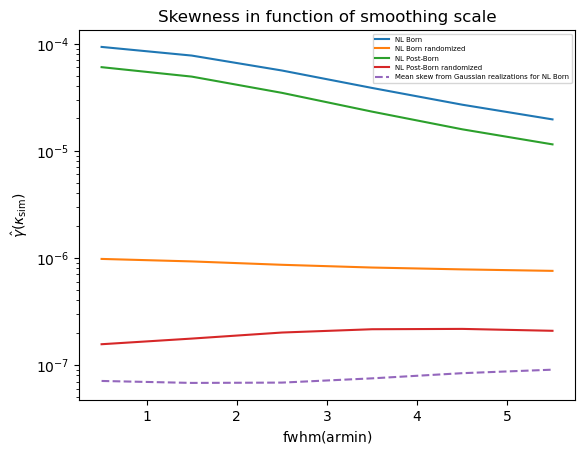

In [18]:
plt.title('Skewness in function of smoothing scale')
for k in [keyB, keyBr, keyPB, keyPBr]:
    skews = np.array(results[k])
    plt.plot(fwhms, abs(skews), label = k)
plt.hlines(0, fwhms.min(), fwhms.max(), ls = '--', color = 'k', alpha = 0.4)

meanskew = 0
for i in range(N):
    meanskew += np.array(results_G_Born[i])
meanskew /= N
plt.plot(fwhms, abs(meanskew), label = 'Mean skew from Gaussian realizations for NL Born', ls = '--')

plt.ylabel(r'$\hat{\gamma}(\kappa_{\rm{sim}})$')
plt.xlabel(r'$\rm{fwhm} (armin)$')

#plt.hlines(-1e-6, 0.5, 6, color = 'k', ls = '--', label = '-1e-6 line', alpha = 0.4)
plt.yscale('log')
plt.legend(fontsize = 5)
plt.savefig('empirical_skew_demuni.png', dpi = 300)